In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datalatih = pd.read_excel("data test.xlsx")
datalatih.head(11)

,Jurusan,Teknik Informatika,DKV,Sistem Informasi,IPK mahasiswa,Jumlah SKS
0,Teknik Informatika,98,98,98,3,24
1,Teknik Informatika,80,76,65,1,18
2,DKV,82,77,82,2,22
3,Teknik Informatika,83,62,75,1,18
4,DKV,96,45,68,1,18
5,Teknik Informatika,91,83,84,2,22
6,Sistem Informasi,88,80,90,2,22
7,Sistem Informasi,84,52,88,1,18
8,DKV,79,89,85,3,24
9,DKV,83,88,81,2,22


In [ ]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jurusan             11 non-null     object
 1   Teknik Informatika  11 non-null     int64 
 2   DKV                 11 non-null     int64 
 3   Sistem Informasi    11 non-null     int64 
 4   IPK mahasiswa       11 non-null     int64 
 5   Jumlah SKS          11 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 656.0+ bytes


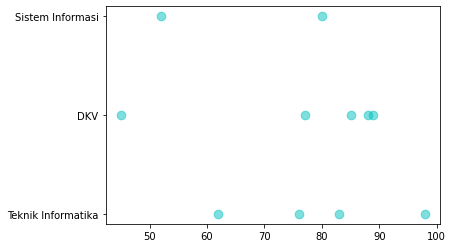

In [7]:
from sklearn.cluster import KMeans
plt.scatter(datalatih.DKV, datalatih.Jurusan, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [8]:
x = datalatih.drop(["Jurusan"], axis=1)
x.head(11)

,Teknik Informatika,DKV,Sistem Informasi,IPK mahasiswa,Jumlah SKS
0,98,98,98,3,24
1,80,76,65,1,18
2,82,77,82,2,22
3,83,62,75,1,18
4,96,45,68,1,18
5,91,83,84,2,22
6,88,80,90,2,22
7,84,52,88,1,18
8,79,89,85,3,24
9,83,88,81,2,22


In [9]:
y = datalatih["Jurusan"]
y.head(11)

0     Teknik Informatika
1     Teknik Informatika
2                    DKV
3     Teknik Informatika
4                    DKV
5     Teknik Informatika
6       Sistem Informasi
7       Sistem Informasi
8                    DKV
9                    DKV
10                   DKV
Name: Jurusan, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()

nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("data test.xlsx")
datauji.head(11)

,Jurusan,Teknik Informatika,DKV,Sistem Informasi,IPK mahasiswa,Jumlah SKS
0,Teknik Informatika,98,98,98,3,24
1,Teknik Informatika,80,76,65,1,18
2,DKV,82,77,82,2,22
3,Teknik Informatika,83,62,75,1,18
4,DKV,96,45,68,1,18
5,Teknik Informatika,91,83,84,2,22
6,Sistem Informasi,88,80,90,2,22
7,Sistem Informasi,84,52,88,1,18
8,DKV,79,89,85,3,24
9,DKV,83,88,81,2,22


In [11]:
x_test = datauji.drop(["Jurusan"], axis=1)
x_test.head(11)

,Teknik Informatika,DKV,Sistem Informasi,IPK mahasiswa,Jumlah SKS
0,98,98,98,3,24
1,80,76,65,1,18
2,82,77,82,2,22
3,83,62,75,1,18
4,96,45,68,1,18
5,91,83,84,2,22
6,88,80,90,2,22
7,84,52,88,1,18
8,79,89,85,3,24
9,83,88,81,2,22


In [12]:
y_uji = datauji["Jurusan"]
y_uji.head(11)

0     Teknik Informatika
1     Teknik Informatika
2                    DKV
3     Teknik Informatika
4                    DKV
5     Teknik Informatika
6       Sistem Informasi
7       Sistem Informasi
8                    DKV
9                    DKV
10                   DKV
Name: Jurusan, dtype: object

In [13]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Teknik Informatika' 'Teknik Informatika' 'DKV' 'Teknik Informatika'
 'Teknik Informatika' 'DKV' 'Sistem Informasi' 'Sistem Informasi' 'DKV'
 'DKV' 'DKV']


In [14]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.8181818181818182


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                    precision    recall  f1-score   support

               DKV       0.80      0.80      0.80         5
  Sistem Informasi       1.00      1.00      1.00         2
Teknik Informatika       0.75      0.75      0.75         4

          accuracy                           0.82        11
         macro avg       0.85      0.85      0.85        11
      weighted avg       0.82      0.82      0.82        11

